# AI4S时代玩转分子动力学？看看你能到第几层！
<a href="https://bohrium.dp.tech/notebook/b2bc7a074549436dbabe09434ab76b59" target="_blank"><img src="https://cdn.dp.tech/bohrium/web/static/images/open-in-bohrium.svg" alt="Open In Bohrium"/></a>

分子动力学（Molecular Dynamics，MD）是一种通过模拟分子系统的运动来研究物质性质的计算方法，在材料、化学、生物医药等领域有着广泛的应用。在AI for Science（AI4S）时代，我们可以利用深度学习技术来构建更准确的原子间相互作用模型，从而提大大高分子动力学模拟的预测能力。

分子动力学说难不难，懂牛顿运动方程就懂它的基本原理了；但说容易也不容易，因为它的底层原理可以很深。在分子动力学模拟中，我们需要求解系统中所有原子的运动方程，这需要使用数值积分方法。数值积分方法的选择对模拟的准确性和稳定性至关重要。

我们将用一个简单的例子，由浅入深、逐层深入地介绍分子动力学数值积分的基本原理。无论你来自哪个行业，只要你对AI for Science感兴趣，都欢迎你来看看自己能到哪一层！

<div style="color:black; background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-top:1rem; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; line-height: 2.5;">
        📖 <b>上手指南</b><br/>
        本文档可在 <a style="font-weight:bold; color:purple" href="https://bohrium-doc.dp.tech/docs/userguide/Notebook" target="_blank"> Bohrium Notebook</a> 上直接运行。你可以点击界面上方按钮 <span style="background-color:darkblue; color:white; padding: 1px; border-radius: 5px;">开始连接</span>，选择 <u>bohrium-notebook</u> 镜像及任意节点配置，稍等片刻即可运行。
    </p>
</div>

## 目录

* [第 0 层：看山不是山、看水不是水——建立定性图像](#layer0)
* [第 1 层：“让牛顿来吧！”——初步建立定量图像](#layer1)
* [第 2 层：数值积分？不就是泰勒展开嘛！](#layer2)
    * [体系选择：一维谐振子（理想弹簧）](#layer21)
    * [代码示例：一维谐振子的 Euler 积分](#layer22)
* [第 3 层：Velocity Verlet 法——换种泰勒展开怎么就可以了？](#layer3)
    * [Velocity Verlet 算法是什么？](#layer31)
    * [为什么在分子动力学中使用Velocity Verlet算法？](#layer32)
    * [示例代码与展示](#layer33)
* [第 4 层：V-V算法为什么这么好？是偶然得到、还是某种底层原理下的必然？](#layer4)
    * [与 ChatGPT 的问答一：V-V 算法的理论解释](#layer41)
    * [与 ChatGPT 的问答二：Python 实现示例](#layer42)
    * [看看 ChatGPT 写的代码对不对](#layer43)
* [第 5 层：成为 AI4S 时代分子动力学开发者！](#layer5)

阅读本教程**最多**需要 20 分钟，让我们开始吧！

## 第0层：看山不是山、看水不是水——建立定性图像 <a id='layer0'></a>

很多时候我们对宏观模拟容易有直观的认识，例如计算机模拟飞行器、汽车、流水等，但对于微观的分子模拟可能相对更难建立直观的认识。

事实上，我们可以把分子模拟想象成是“许多原子的运动”。在《费曼物理学讲义，第一卷》中，理查德·费曼关于原子运动说了以下内容：

<div style="background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-top:1rem; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; padding-right: 1rem; line-height: 2.5;">
        📖 <b>“<span style="color:purple">也许我们可以通过想象许多原子都在独立地以各自的方式来回晃动（jiggling）来更好地理解这个概念。</span>假设我们有很多原子，我们把其中一个涂成红色，这样我们就可以观察它。我们观察了一会儿，它在液体中晃动着，游走着，过了一会儿又回到了原来的位置。然后我们对另一个原子做同样的事情，依此类推。我们发现每个原子都在复杂地晃动和摇摆，但过了一段时间又回到了原来的位置。所以原子总是在晃动和摇摆，但它们并没有永久地到达任何地方。”</b>
</div>

这个“Jiggling Atoms”的想象可以说是惟妙惟肖。

![Jiggling Atoms](https://upload.wikimedia.org/wikipedia/commons/2/23/Thermally_Agitated_Molecule.gif)

想象一下。如果你看到的水不再是水，而是一堆“Jiggling H and O atoms”；如果你看到的山不再是山，而是一堆来回晃动的矿物和岩石元素（Si/O/Al/Fe/Ca等）；那么，第0层，稳了。

## 第1层：“让牛顿来吧！”——初步建立定量图像 <a id='layer1'></a>

那么，原子运动的规律是什么？

一句诗说得好，“自然及其法则曾隐藏在黑夜中，上帝说：让牛顿来吧！于是一切都变得光明。”

![Newton](https://upload.wikimedia.org/wikipedia/commons/0/0e/Newtonbig.gif)

尽管牛顿的时代人们尚未建立对原子运动的定量描述，但在相当大的适用范围内，原子运动可以被牛顿公式描述：

$$
F = ma
$$

每个原子有自己的质量$m$，其加速度$a$与质量$m$的乘积是受力$F$。这跟地球绕太阳转的规律是一样的！注意这里需要些（还是来自牛顿的）微积分的概念。考虑位置$r(t)$是随时间变化的连续变量，速度$v(t)=\dot{r}$是位置对时间的一阶导，加速度$a(t)=\dot{v}=\ddot{r}$是位置对时间的二阶导、速度对时间的一阶导。定义动量$p=mv$。我们有：

$$
\dot{r} = p/m,~\dot{p} = F
$$

通常我们称$(r,p)$所在的空间为体系的**相空间**，并将$x=(r,p)$称为相空间中的一点。我们有：

$$
\dot{x} = (p/m, F).
$$

如果你还记得牛顿公式，只不过有可能不记得微积分的式子了，没关系，第1层算过。

### 体系选择 <a id='layer21'></a>
诺贝尔奖获得者物理学家Leon Cooper曾说：

<div style="background-color:#FFF3E9; border: 1px solid #FFE0C3; border-radius: 10px; margin-top:1rem; margin-bottom:1rem">
    <p style="margin:1rem; padding-left: 1rem; padding-right: 1rem; line-height: 2.5;">
        📖 <b><span style="color:purple">“谐振子（Harmonic Oscillator）在物理学中无处不在，从高中的单摆弹簧到最先进的量子场论。”</b>（略有改编）
</div>

![HO](https://upload.wikimedia.org/wikipedia/commons/d/d5/Animated-mass-spring-faster.gif)

这里我们以谐振子为例，你可以把它想象成是一个弹簧、或者在平衡位置附近振动的一个原子。其受力即负位移与弹性系数的乘积：

$$
F=ma=-kr.
$$
进一步，根据Euler方法，有：

$$r(t+\Delta t)=r(t)+v(t){\cdot}{\Delta}t $$
        
$$a(t)=-(k/m)r(t)$$
        
$$v(t+\Delta t)=v(t)-(k/m)r(t){\cdot}{\Delta}t$$

接下来，我们就用 Python 代码来演示这个过程！

为简单起见，忽略单位，我们令$k=1,~m=1,~r(0)=1,~v(0)=0$。

事实上，此时我们很容易得到解析解：
        
$$r(t)= \cos t$$
        
$$v(t)= -\sin t$$
        
且总能量 $E(t)=\frac{1}{2}(r^2(t)+v^2(t))\equiv\frac{1}{2}$ 是个常数，即在这个例子中的理想情况下，弹簧的总能量不随着时间改变。

**这个解析解和总能量常数都能作为我们检测数值算法是否有效的办法！**

### 代码示例：一维谐振子的Euler积分
首先，我们需要导入一些必要的库并设置参数：

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
m = 1.0  # 质量
k = 1.0  # 弹簧常数
r0 = 1.0  # 初始位置
v0 = 0.0  # 初始速度
dt = 0.01  # 时间步长
n_steps = 10000  # 模拟步数

接下来，我们定义一个函数来计算加速度：

In [2]:
# 定义加速度的函数
def acceleration(r, k):
    return -k * r

现在我们可以使用Euler算法进行模拟：

In [3]:
# 初始化位置、速度和加速度数组
r = np.zeros(n_steps)
v = np.zeros(n_steps)
a = np.zeros(n_steps)

r[0] = r0
v[0] = v0
a[0] = acceleration(r0, k)

# 使用Euler算法进行模拟
for i in range(1, n_steps):
    r[i] = r[i-1] + v[i-1] * dt 
    v[i] = v[i-1] + a[i-1] * dt
    a[i] = acceleration(r[i], k)

最后，我们可以绘制谐振子的位置、速度、能量随时间的变化：

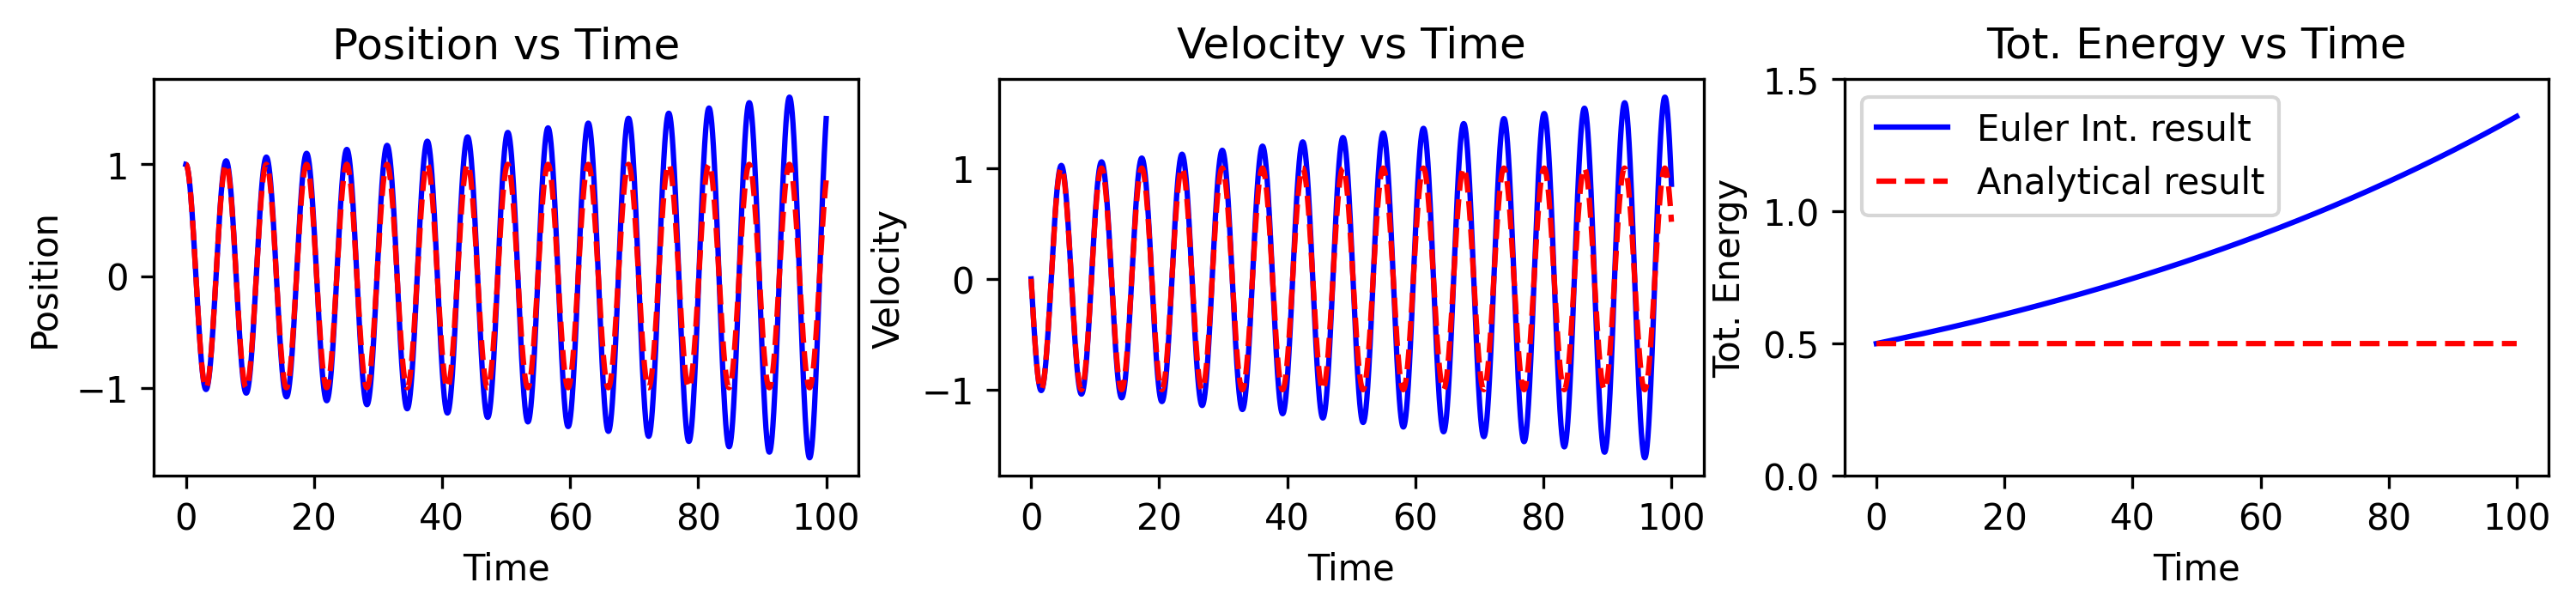

In [5]:
t = np.arange(n_steps) * dt

plt.figure(figsize=(12, 2), dpi=300)
plt.subplot(131)
plt.plot(t, r, 'b-',label='Euler Int. result')
plt.plot(t, np.cos(t), 'r--',label='Analytical result')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')

plt.subplot(132)
plt.plot(t, v, 'b-',label='Euler Int. result')
plt.plot(t, -np.sin(t), 'r--',label='Analytical result')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')

plt.subplot(133)
plt.plot(t, (r**2+v**2)/2, 'b-',label='Euler Int. result')
plt.plot(t, t*0+0.5, 'r--',label='Analytical result')
plt.ylim([0,1.5])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Tot. Energy')
plt.title('Tot. Energy vs Time')

plt.show()

很遗憾，我们发现，利用Euler算法，随着时间的演化，这里坐标与速度范围逐步扩大，总能量也在逐渐变大、而非守恒，这些物理量的数值解（Euler Int. result）与解析解（Analytical result）渐行渐远。所以，连一个谐振子都算不对的算法，究竟有什么用？

更往深一步，这里总能量逐渐变大的现象在分子动力学中被称作“能量飘逸”（Energy Drift）。事实上，哪怕用再小的时间步长$\delta t$、用再高阶的泰勒展开，这个问题依旧存在。

**如果你是有一定经验的分子动力学开发者，你一定会发现，能量守恒是你绕不过去的测试。。。**

如果直到这里的泰勒展开你都能看懂、且你能成功地运行代码，那么第2层算过。关于究竟该怎么办，我们前往第3层。

# 第3层：Velocity Verlet法——换种泰勒展开怎么就可以了？

我们先不管为什么，直接考虑换种泰勒展开的组合方式：
$$r(t+{\delta}t)=r(t)+v(t) {\delta}t+\frac{1}{2} a(t) {\delta}t^2+...$$
这个式子可以直接用于更新坐标。

同理，将$t+{\delta}t$时刻的坐标进行泰勒展开，$t$时刻坐标可以被近似为：
$$r(t)=r(t+{\delta}t)-v(t+{\delta}t){\delta}t+\frac{1}{2}a(t+{\delta}t){\delta}t^2+...$$
两式相加有：
$$v(t){\delta}t+\frac{1}{2}a(t){\delta}t^2-v(t+{\delta}t){\delta}t+\frac{1}{2}a(t+{\delta}t){\delta}t^2=0$$
$$v(t+{\delta}t)=v(t)+\frac{a(t)+a(t+{\delta}t)}{2}{\delta}t$$
我们由此获得速度的更新方法。在两式相加时，速度上的两个三阶误差可以消去以提升精度。将坐标与速度的更新方法结合，即为Velocity-Verlet积分法。

以下为Chatgpt关于Velocity Verlet算法的一些介绍。

### Velocity Verlet算法是什么？

Velocity Verlet算法是一种用于求解分子动力学模拟中粒子牛顿运动方程的数值积分方法。它是一个二阶、时间可逆的算法，用于计算离散时间步长下粒子的位置、速度和加速度。

### 为什么在分子动力学中使用Velocity Verlet算法？

Velocity Verlet算法在分子动力学模拟中受欢迎，原因有以下几点：

1. 时间可逆性
2. 良好的能量守恒性
3. 简单易于实现
4. 二阶精度
5. 易于与其他算法结合，以控制压力、温度等

### 示例代码与展示 <a id='layer33'></a>

现在让我们深入了解一些代码示例和简单演示。

In [6]:
# 初始化位置、速度和加速度数组
r = np.zeros(n_steps)
v = np.zeros(n_steps)
a = np.zeros(n_steps)

r[0] = r0
v[0] = v0
a[0] = acceleration(r0, k)

# 使用Velocity Verlet算法进行模拟
for i in range(1, n_steps):
    r[i] = r[i-1] + v[i-1] * dt + 0.5 * a[i-1] * dt**2
    a[i] = acceleration(r[i], k)
    v[i] = v[i-1] + 0.5 * (a[i-1] + a[i]) * dt

类似地，我们可以绘制谐振子的位置、速度、能量随时间的变化：

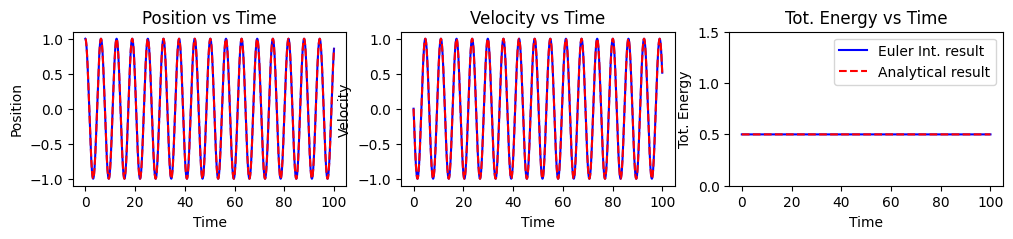

In [7]:
t = np.arange(n_steps) * dt

plt.figure(figsize=(12, 2))
plt.subplot(131)
plt.plot(t, r, 'b-',label='Euler Int. result')
plt.plot(t, np.cos(t), 'r--',label='Analytical result')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Position vs Time')

plt.subplot(132)
plt.plot(t, v, 'b-',label='Euler Int. result')
plt.plot(t, -np.sin(t), 'r--',label='Analytical result')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Velocity vs Time')

plt.subplot(133)
plt.plot(t, (r**2+v**2)/2, 'b-',label='Euler Int. result')
plt.plot(t, t*0+0.5, 'r--',label='Analytical result')
plt.ylim([0,1.5])
plt.legend()
plt.xlabel('Time')
plt.ylabel('Tot. Energy')
plt.title('Tot. Energy vs Time')

plt.show()

从结果可以看出，Velocity Verlet算法能够准确地模拟一维谐振子的运动，并且在长时间尺度上保持能量守恒和稳定性。

如果直到这里你都能看懂、且你能成功地运行代码，那么第3层算过。关于究竟为什么Velocity Verlet算法能有这么好的性质，我们前往第4层。

## 第4层：V-V 算法为什么这么好？是偶然得到、还是某种底层原理下的必然？<a id='layer4'></a>

解释“Why”总是一个很难有尽头的事情，例如不得不提及辛结构 (Symplectic Structure)这类术语。

于是本文作者偷了个懒，问了下ChatGPT。能达到ChatGPT回答层次的同学，就算通过第4层。

### 问题 1：<a id='layer41'></a>
<div style="padding: 10px; background-color: #f5f5f5; color: black; margin-bottom: 15px; border-radius: 30px;">
    <p style='padding: 10px'>请用公式介绍通过刘维尔算子展开和 Trotter 分解得到的分子动力学中辛积分子 Velocity Verlet Integrator 的过程。</b></p>
        <p style='padding-left: 10px; padding-right: 10px;'>并解释为什么这个过程得到的Integrator是保辛结构的、并保证能量守恒？</p>
</div>

**答**：为了描述 Velocity Verlet Integrator 的过程，我们首先需要了解刘维尔算子和 Trotter 分解。

刘维尔算子 L 是一个描述相空间中粒子状态演化的算子，定义为：

$L = p \frac{\partial}{\partial q} - \frac{\partial V}{\partial q} \frac{\partial}{\partial p}$

这里，p 是动量，q 是广义坐标，V 是势能。对于一个粒子在时间 t 的状态 (q(t), p(t))，其在稍后的时间 t+Δt 的状态可以通过以下方式计算：

$p(t+\frac{\Delta t}{2}) = p(t) - \frac{\Delta t}{2} \frac{\partial V}{\partial q(t)}$

然而，直接计算 $exp(\Delta t L)$ 相对复杂。因此，我们通常使用 Trotter 分解来近似计算这个指数算子。Trotter 分解将 L 分解为两个部分：L = L1 + L2，其中：

$L_1 = p \frac{\partial}{\partial q}$

$L_2 = - \frac{\partial V}{\partial q} \frac{\partial}{\partial p}$

这样，我们可以近似地写：

$$
\exp(\Delta t L) \approx \exp(\frac{\Delta t}{2} L_1) \exp(\Delta t L_2) \exp(\frac{\Delta t}{2} L_1)
$$

现在，我们可以通过 Velocity Verlet Integrator 的过程来计算粒子在 t+Δt 的状态：

1. 首先，更新一半的动量： $p(t+\frac{\Delta t}{2}) = p(t) - \frac{\Delta t}{2} \frac{\partial V}{\partial q(t)}$

2. 然后，更新坐标： $q(t+\Delta t) = q(t) + \Delta t \, p(t+\frac{\Delta t}{2})$

3. 最后，更新另一半的动量： $p(t+\Delta t) = p(t+\frac{\Delta t}{2}) - \frac{\Delta t}{2} \frac{\partial V}{\partial q(t+\Delta t)}$

Velocity Verlet Integrator 是保辛的，因为它满足辛条件，即它保留相空间的体积。这是因为在整个积分过程中，动量和坐标的更新是分离的，它们分别依赖于 L1 和 L2。这使得在每个步骤中，雅可比行列式的行列式为 1，从而保证了相空间的体积不变。保辛结构确保了积分器在长时间内保持精确和稳定。

此外，Velocity Verlet Integrator 能够保证能量守恒，因为它在更新动量和坐标时使用了相同的势能梯度。这确保了动能和势能在整个过程中保持守恒，从而使整个系统的总能量保持不变。

### 问题 2： <a id='layer42'></a>
<div style="padding: 10px; background-color: #f5f5f5; color: black; margin-bottom: 15px; border-radius: 30px;">
    <p style='padding: 10px'><b>继续问：</b></p>
        <p style='padding-left: 10px; padding-right: 10px;'>请以谐振子为例，更加生动地介绍这段过程，并转化为含有示范代码的Notebook</p>
</div>

答：我们以一个简单的一维谐振子为例，其势能函数为 $V(q) = (1/2) k q^2$，其中 $k$ 是弹簧常数。我们将使用 Velocity Verlet Integrator 来模拟谐振子的运动。

首先，我们需要定义谐振子的势能函数及其梯度：

```python
import numpy as np

def potential_energy(q, k=1.0):
    return 0.5 * k * q**2

def potential_energy_gradient(q, k=1.0):
    return k * q
```

接下来，我们实现 Velocity Verlet Integrator：

```python
def velocity_verlet_step(q, p, dt, k=1.0):
    # 1. 更新一半的动量
    p_half = p - 0.5 * dt * potential_energy_gradient(q, k)
    
    # 2. 更新坐标
    q_new = q + dt * p_half
    
    # 3. 更新另一半的动量
    p_new = p_half - 0.5 * dt * potential_energy_gradient(q_new, k)
    
    return q_new, p_new
```

现在，我们可以使用 Velocity Verlet Integrator 来模拟谐振子的运动。假设初始状态为 q(0) = 1, p(0) = 0，时间步长为 dt = 0.01，总共模拟 1000 个时间步：

```python
import matplotlib.pyplot as plt

# 初始化参数
q = 1.0
p = 0.0
dt = 0.01
num_steps = 1000

# 用于存储结果的数组
q_values = np.zeros(num_steps)
p_values = np.zeros(num_steps)
energy_values = np.zeros(num_steps)

# 模拟过程
for i in range(num_steps):
    q_values[i] = q
    p_values[i] = p
    energy_values[i] = 0.5 * p**2 + potential_energy(q)
    
    q, p = velocity_verlet_step(q, p, dt)

# 绘制结果
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(q_values)
plt.xlabel('Time step')
plt.ylabel('Position')
plt.subplot(132)
plt.plot(p_values)
plt.xlabel('Time step')
plt.ylabel('Momentum')
plt.subplot(133)
plt.plot(energy_values)
plt.xlabel('Time step')
plt.ylabel('Total energy')
plt.tight_layout()
plt.show()
```

从结果中，我们可以看到谐振子的位置和动量随时间的演化，以及系统的总能量保持不变。这说明 Velocity Verlet Integrator 能够有效地模拟谐振子的运动，并保证能量守恒。

### 看看ChatGPT写的代码对不对

我们把上述代码复制在下面的代码框，发现运行根本没有问题。。有点强啊！（本文作者不会说前面的代码也大多是ChatGPT写的。。）

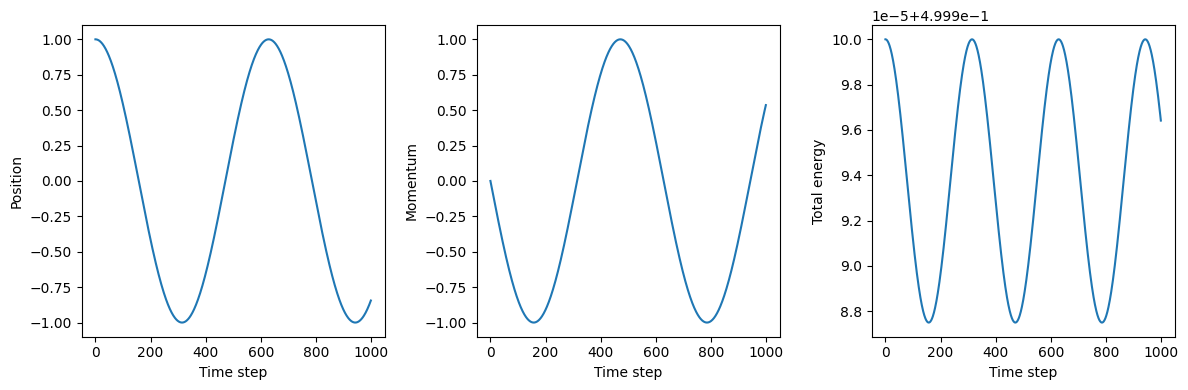

In [8]:
import numpy as np

def potential_energy(q, k=1.0):
    return 0.5 * k * q**2

def potential_energy_gradient(q, k=1.0):
    return k * q

def velocity_verlet_step(q, p, dt, k=1.0):
    # 1. 更新一半的动量
    p_half = p - 0.5 * dt * potential_energy_gradient(q, k)
    
    # 2. 更新坐标
    q_new = q + dt * p_half
    
    # 3. 更新另一半的动量
    p_new = p_half - 0.5 * dt * potential_energy_gradient(q_new, k)
    
    return q_new, p_new

import matplotlib.pyplot as plt

# 初始化参数
q = 1.0
p = 0.0
dt = 0.01
num_steps = 1000

# 用于存储结果的数组
q_values = np.zeros(num_steps)
p_values = np.zeros(num_steps)
energy_values = np.zeros(num_steps)

# 模拟过程
for i in range(num_steps):
    q_values[i] = q
    p_values[i] = p
    energy_values[i] = 0.5 * p**2 + potential_energy(q)
    
    q, p = velocity_verlet_step(q, p, dt)

# 绘制结果
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(q_values)
plt.xlabel('Time step')
plt.ylabel('Position')
plt.subplot(132)
plt.plot(p_values)
plt.xlabel('Time step')
plt.ylabel('Momentum')
plt.subplot(133)
plt.plot(energy_values)
plt.xlabel('Time step')
plt.ylabel('Total energy')
plt.tight_layout()
plt.show()

注意：这里能量看起来有些波浪、不像守恒，但注意纵轴左边范围其实很小，在0.5$\pm$1e-5的量级，属于正常的数值误差范围。

# 第5层：成为AI4S时代分子动力学开发者！

如果第4层都没难到你，那么你基本具备成为AI4S时代分子动力学开发者的潜质了！（你需要注意到，第4层里ChatGPT关于“Velocity Verlet Integrator能够保证能量守恒”的原因说的是有问题的，如果你关心更合适的回答，可以参考Tuckerman经典书的3.13，“Exactly conserved time step dependent Hamiltonians”）。

关于第5层，既然是“AI4S时代分子动力学开发者”，除了掌握好分子动力学基本原理，本文作者鼓励你：
1. 多多关注AI4S最新进展和最佳实践。这里强烈推荐关注DeepModeling开源社区、深度势能公众号、以及展示此Notebook的深势科技Bohrium云平台；
2. 多向大语言模型请教，它真的很强。。。

最后，顺着第4层的问题，本文作者继续问了ChatGPT两个问题，答得都不错：

### 问：是不是温度压强控制、多尺度时间步长、路径积分分子动力学等，都可以在这个框架下进一步展开？

答：是的，Velocity Verlet Integrator 是一个非常通用的框架，可以在此基础上进一步扩展以实现更复杂的模拟方法，例如温度压强控制、多尺度时间步长和路径积分分子动力学等。

1. 温度压强控制：在分子动力学模拟中，我们通常需要控制系统的温度和压强。这可以通过在 Velocity Verlet Integrator 中引入额外的热浴或压力耦合算法来实现，例如 Berendsen 热浴、Nose-Hoover 热浴、Andersen 压力耦合等。这些算法通过调整粒子的动量或坐标来实现对温度和压强的控制。

2. 多尺度时间步长：在分子动力学模拟中，系统中的不同部分可能具有不同的时间尺度。例如，键合相互作用通常比非键合相互作用具有更快的时间尺度。为了提高计算效率，我们可以在 Velocity Verlet Integrator 中引入多尺度时间步长方法，例如 RESPA（Reference System Propagator Algorithm）。这种方法将系统中的相互作用分为不同的层次，并为每个层次分配不同的时间步长，从而在保持精度的同时提高计算效率。

3. 路径积分分子动力学：在量子化学模拟中，我们需要考虑原子核的量子效应。这可以通过将原子核视为量子谐振子并使用路径积分方法来实现。在这种方法中，原子核的量子态被表示为一系列经典粒子的路径，这些路径可以通过类似于 Velocity Verlet Integrator 的方法进行采样。这种方法被称为路径积分分子动力学（Path Integral Molecular Dynamics，PIMD），它可以在保持保辛结构的同时考虑量子效应。

总之，Velocity Verlet Integrator 是一个非常灵活的框架，可以在此基础上扩展以实现各种先进的分子动力学模拟方法。


### 问：Langevin Integrator会用到它吗？具体是怎么用的？

Langevin Integrator 是一种用于模拟带有随机热浴的分子动力学系统的积分器。它在 Velocity Verlet Integrator 的基础上引入了随机力和阻尼力，以模拟系统与热浴的相互作用。Langevin 动力学方程如下：

dq/dt = p/m

dp/dt = -∂V/∂q - γp + R(t)

其中，γ 是阻尼系数，R(t) 是随机力，满足均值为零且与时间无关的高斯分布。Langevin Integrator 的一个常见实现是通过在 Velocity Verlet Integrator 中加入随机力和阻尼力来实现的。具体步骤如下：

1. 更新一半的动量： p(t+Δt/2) = p(t) - (Δt/2) ∂V/∂q(t) - (Δt/2) γ p(t) + (Δt/2) R(t)
2. 更新坐标： q(t+Δt) = q(t) + Δt p(t+Δt/2) / m
3. 更新另一半的动量： p(t+Δt) = p(t+Δt/2) - (Δt/2) ∂V/∂q(t+Δt) - (Δt/2) γ p(t+Δt/2) + (Δt/2) R(t+Δt)

在这个过程中，我们需要在每个时间步长中生成满足高斯分布的随机力 R(t)。这可以通过 numpy 的 `numpy.random.normal()` 函数来实现。

以下是一个使用 Langevin Integrator 模拟一维谐振子的示例：

```python
def langevin_step(q, p, dt, m=1.0, k=1.0, gamma=1.0, T=1.0):
    # 计算随机力
    sigma = np.sqrt(2.0 * gamma * T / dt)
    R_t = np.random.normal(0, sigma)
    R_t_plus_dt = np.random.normal(0, sigma)

    # 1. 更新一半的动量
    p_half = p - 0.5 * dt * potential_energy_gradient(q, k) - 0.5 * dt * gamma * p + 0.5 * dt * R_t

    # 2. 更新坐标
    q_new = q + dt * p_half / m

    # 3. 更新另一半的动量
    p_new = p_half - 0.5 * dt * potential_energy_gradient(q_new, k) - 0.5 * dt * gamma * p_half + 0.5 * dt * R_t_plus_dt

    return q_new, p_new
```

这个示例中，我们在 Velocity Verlet Integrator 的基础上加入了阻尼力和随机力，以实现 Langevin Integrator。通过调整阻尼系数 γ 和温度 T，我们可以模拟不同条件下的带有热浴的分子动力学系统。